In [76]:
from itertools import permutations
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import sklearn
import sklearn.datasets as ds
import sklearn.decomposition as dec
import sklearn.cluster as clu
import sklearn.cross_validation as cv
import sklearn.grid_search as gs
import sklearn.feature_extraction.text as text
import sklearn.neighbors as nb
import sklearn.naive_bayes as nbs
import sklearn.svm as svm
import sklearn.ensemble as ske
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
f = lambda x : np.exp( 3 * x )

In [3]:
x_tr = np.linspace(0., 2, 200)
y_tr = f(x_tr)

In [4]:
x = np.array([0, .1, .2, .3, .5, .8, .9 , 1])
y = f(x) + np.random.randn(len(x))

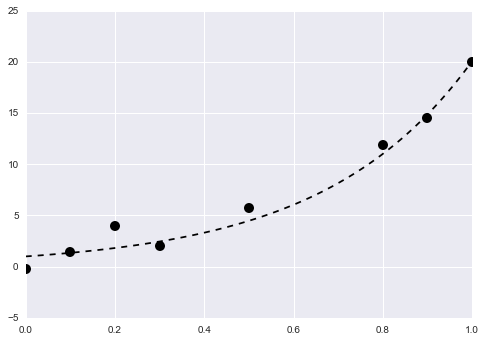

In [5]:
plt.plot(x_tr[:100], y_tr[:100], "--k")
plt.plot(x, y , "ok", ms=10)

In [6]:
lr = lm.LinearRegression()
lr.fit(x[: , np.newaxis], y)
y_lr = lr.predict(x_tr[:, np.newaxis])

(-1.2751091674654307, 21.043770661073314)

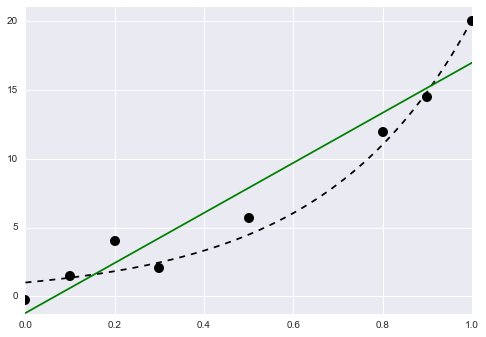

In [7]:
plt.plot(x_tr, y_tr, "--k")
plt.plot(x_tr, y_lr, "g")
plt.plot(x,y, "ok", ms=10)
plt.xlim(0,1)
plt.ylim(y.min()-1, y.max()+1)

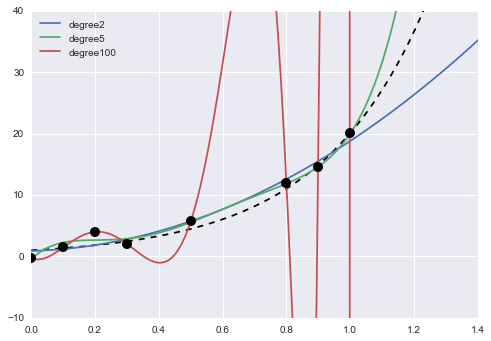

In [8]:
plt.plot(x_tr, y_tr, "--k")
for deg in [2 ,5, 100]:
    lr.fit(np.vander(x, deg+1), y)
    y_lrp = lr.predict(np.vander(x_tr, deg+1))
    plt.plot(x_tr, y_lrp, label ="degree"+str(deg))
    plt.legend(loc=2)
    plt.xlim(0, 1.4)
    plt.ylim(-10, 40)
plt.plot(x,y, "ok", ms=10)

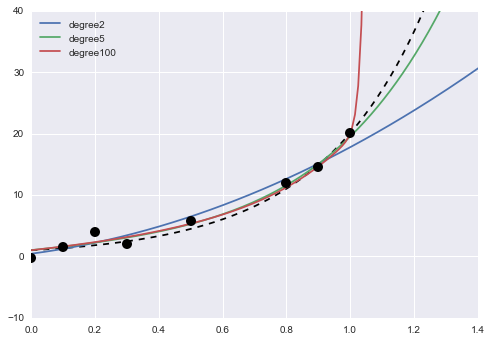

In [9]:
ridge = lm.RidgeCV()
plt.plot(x_tr, y_tr, "--k")

for deg in [2, 5, 100]:
    ridge.fit(np.vander(x, deg+1), y)
    y_lrp = ridge.predict(np.vander(x_tr, deg+1))
    plt.plot(x_tr, y_lrp, label ="degree"+str(deg))
    plt.legend(loc=2)
    plt.xlim(0, 1.4)
    plt.ylim(-10, 40)
plt.plot(x,y, "ok", ms=10)

# 8.2 ロジスティック回帰

In [10]:
train = pd.read_csv("data/titanic/titanic_train.csv")
test = pd.read_csv("data/titanic/titanic_test.csv")
train[train.columns[[2,4,5,1]]].head()

,Pclass,Sex,Age,Survived
0,3,male,22,0
1,1,female,38,1
2,3,female,26,1
3,1,female,35,1
4,3,male,35,0


In [11]:
data = train[["Sex", "Age", "Pclass", "Survived"]].copy()
data["Sex"] = data["Sex"] == "female"
data = data.dropna()

In [12]:
data_np = data.astype(np.int32).values
X = data_np[:, :-1]
y = data_np[:, -1]

In [13]:
female = X[:, 0] ==1
survived = y == 1
age = X[:, 1]
bins_ = np.arange(0, 81, 5)

In [14]:
S = {
    "male": np.histogram(age[survived & ~female], bins=bins_)[0],
    "female": np.histogram(age[survived & female], bins=bins_)[0]
}
D = {
    "male": np.histogram(age[~survived & ~female], bins=bins_)[0],
    "female": np.histogram(age[~survived & female], bins=bins_)[0]
}

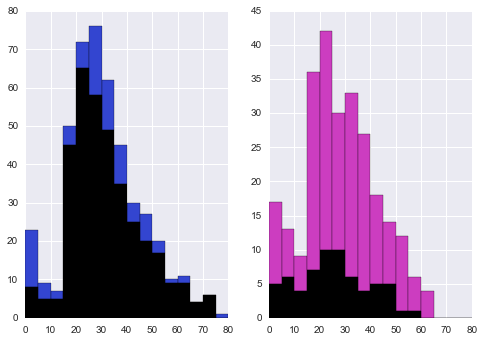

In [15]:
bins = bins_[:-1]
for i, sex, color in zip((0,1), ("male", "female"), ("#3345d0", "#cc3dc0")):
    plt.subplot(121 + i)
    plt.bar(bins, S[sex], bottom=D[sex], color=color, width=5, label="survived")
    plt.bar(bins, D[sex], color='k', width=5, label='died')

In [16]:
X_train, X_test, Y_train, Y_test = cv.train_test_split(X, y, test_size=.05)

In [17]:
logreg = lm.LogisticRegression()

In [18]:
logreg.fit(X_train, Y_train)
y_predicted = logreg.predict(X_test)

([], <a list of 0 Text yticklabel objects>)

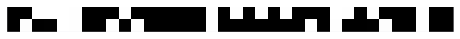

In [19]:
plt.imshow(np.vstack((Y_test, y_predicted)), interpolation="none", cmap="bone")
plt.xticks([])
plt.yticks([])


In [20]:
cv.cross_val_score(logreg, X, y)

array([ 0.78661088,  0.78991597,  0.78059072])

In [21]:
grid = gs.GridSearchCV(logreg, {"C":np.logspace(-5, 5 , 50)})
grid.fit(X_train, Y_train)
grid.best_params_

{'C': 1.2648552168552958}

In [22]:
cv.cross_val_score(grid.best_estimator_, X, y)

array([ 0.78242678,  0.78571429,  0.77637131])

#  8.3 K近傍分類器


In [23]:
digits = ds.load_digits()
X = digits.data
y = digits.target

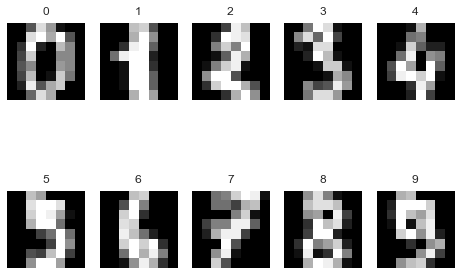

In [24]:
nrows, ncols = 2, 5
plt.gray()
for i in range(ncols*nrows):
    ax = plt.subplot(nrows, ncols, i+1)
    ax.matshow(digits.images[i,...])
    plt.xticks([])
    plt.yticks([])
    plt.title(digits.target[i])

In [25]:
X_train, X_test, y_train, y_test = cv.train_test_split(X, y, test_size=.25)
knc = nb.KNeighborsClassifier()
knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [26]:
knc.score(X_test, y_test)

0.98888888888888893

# 単純ベイスによる自然言語処理

In [27]:
df = pd.read_csv("data/troll/troll.csv")

In [28]:
df[["Insult", "Comment"]].tail()

,Insult,Comment
3942,1,"""you are both morons and that is never happening"""
3943,0,"""Many toolbars include spell check, like Yahoo..."
3944,0,"""@LambeauOrWrigley\xa0\xa0@K.Moss\xa0\nSioux F..."
3945,0,"""How about Felix? He is sure turning into one ..."
3946,0,"""You're all upset, defending this hipster band..."


In [29]:
tf = text.TfidfVectorizer()
X = tf.fit_transform(df["Comment"])
print(X.shape)
y = df["Insult"]

(3947, 16469)


In [30]:
X_train, X_test, y_train, y_test = cv.train_test_split(X, y, test_size=.2)

In [31]:
bnb = gs.GridSearchCV(nbs.BernoulliNB(), param_grid={"alpha": np.logspace(-2, 2, 50)})
bnb.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-02,   1.20679e-02,   1.45635e-02,   1.75751e-02,
         2.12095e-02,   2.55955e-02,   3.08884e-02,   3.72759e-02,
         4.49843e-02,   5.42868e-02,   6.55129e-02,   7.90604e-02,
         9.54095e-02,   1.15140e-01,   1.38950e-01,   1.67683e-01,
         2....    3.90694e+01,   4.71487e+01,   5.68987e+01,   6.86649e+01,
         8.28643e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [32]:
bnb.score(X_test, y_test)

0.74936708860759493

In [33]:
names = np.asarray(tf.get_feature_names())
print(",".join(names[np.argsort(bnb.best_estimator_.coef_[0, :])[::-1][:50]]))

you,your,are,the,to,and,of,that,is,in,it,like,have,on,for,re,not,just,an,so,get,idiot,with,xa0,all,be,fuck,what,go,this,do,up,don,but,if,or,can,stupid,ass,know,as,no,about,who,was,bitch,dumb,here,because,me


# サポートベクターマシン

In [34]:
X = np.random.randn(200, 2)
y = X[:, 0] + X[:, 1] > 1

In [35]:
est = svm.LinearSVC()
est.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [36]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3,3, 500))
def plot_decision_function(est):
    Z = est.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap = plt.cm.Blues
    plt.imshow(
        Z, 
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        aspect="auto",
        origin="lower",
        cmap=cmap)
    plt.contour(xx, yy, Z , levels=[0], linewidths=2, coors="k")
    plt.scatter(X[:, 0], X[:, 1], s=30, c=.5+.5*y, lw=1, cmap=cmap, vmin=0, vmax=1)

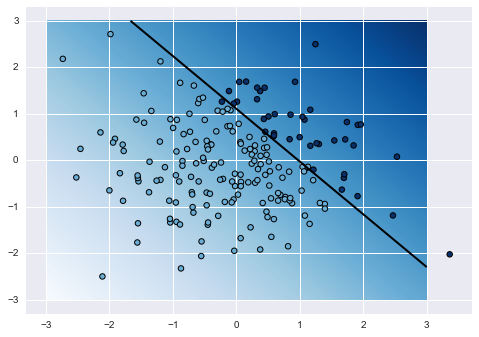

In [37]:
plot_decision_function(est)

Score 0.480243612597


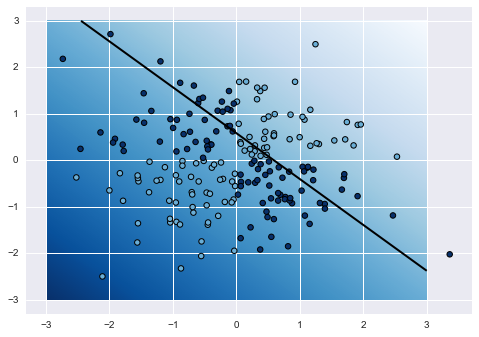

In [38]:
y = np.logical_xor(X[:,0]>0, X[:,1]>0)
est = gs.GridSearchCV(svm.LinearSVC(), {"C": np.logspace(-3, 3, 10)})
est.fit(X, y)
print("Score " + str(cv.cross_val_score(est, X, y).mean()))
plot_decision_function(est)

Score 0.974896019014


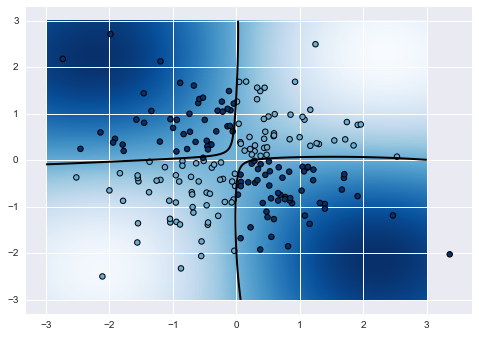

In [39]:
est = gs.GridSearchCV(svm.SVC(), {"C":np.logspace(-3, 3, 10), "gamma": np.logspace(-3, 3, 10)})
est.fit(X, y)
print("Score " + str(cv.cross_val_score(est, X, y).mean()))
plot_decision_function(est.best_estimator_)

# 8.6 ランダムフォレスト

In [40]:
data = ds.load_boston()

In [41]:
reg = ske.RandomForestClassifier()

In [42]:
X = data["data"]
y = data["target"]

In [43]:
reg.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
fet_ind = np.argsort(reg.feature_importances_)[::-1]
fet_imp = reg.feature_importances_[fet_ind]

(0, 13)

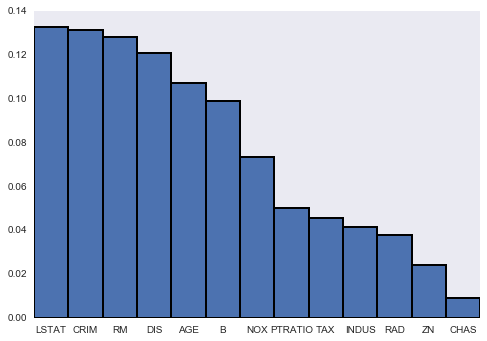

In [45]:
ax = plt.subplot(111)
plt.bar(np.arange(len(fet_imp)), fet_imp, width=1, lw=2)
plt.grid(False)
ax.set_xticks(np.arange(len(fet_imp)) + .5 )
ax.set_xticklabels(data['feature_names'][fet_ind])
plt.xlim(0, len(fet_imp))

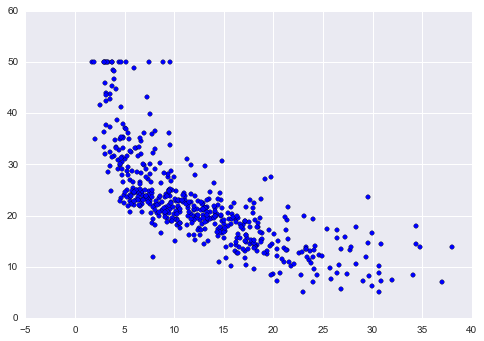

In [46]:
plt.scatter(X[:, -1], y)

# 8.7 主成分分析

In [48]:
iris = ds.load_iris()
X = iris.data
y = iris.target
print(X.shape)

(150, 4)


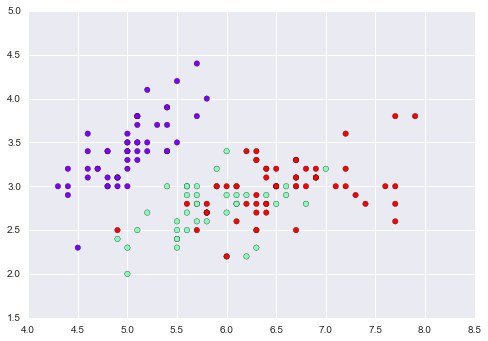

In [53]:
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.rainbow)

In [55]:
X_bix = dec.PCA().fit_transform(X)

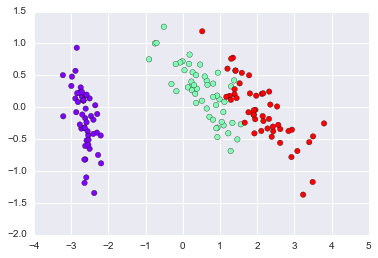

In [58]:
plt.scatter(X_bix[:,0],X_bix[:,1],c=y, s=30, cmap=plt.cm.rainbow )

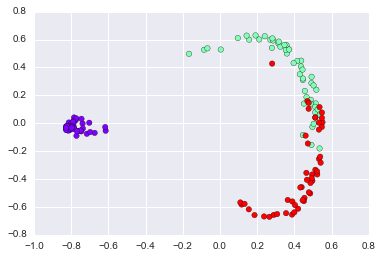

In [61]:
X_ter = dec.KernelPCA(kernel="rbf").fit_transform(X)
plt.scatter(X_ter[:, 0], X_ter[:, 1], c=y, s=30, cmap=plt.cm.rainbow)

# 8.8クラスタリング

In [79]:
X, y = ds.make_blobs(n_samples=200, n_features=2, centers=3)

In [80]:
def relabel(cl):
    if np.max(cl) != 2:
        return cl
    perms = np.array(list(permutations((0,1,2))))
    i = np.argmin([np.sum(np.abs(perm[cl]- y))] for perm in perms)
    p = perms[i]
    return p[cl]

def display_clustering(lables, title):
    lables = relabel(lables)
    for i,(c, title) in enumerate(zip([y, lables], ["True lables", title])):
        plt.subplot(121+i)
        plt.scatter(X[:, 0], X[:, 1], c=c, s=30, linewidths=0, cmap=plt.cm.rainbow)
        plt.xticks([])
        plt.yticks([])
        plt.title(title)

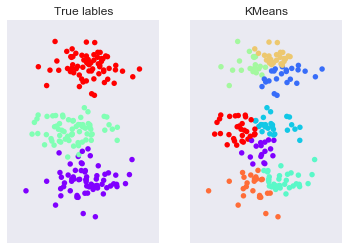

In [81]:
km = clu.KMeans()
km.fit(X)
display_clustering(km.labels_, "KMeans")

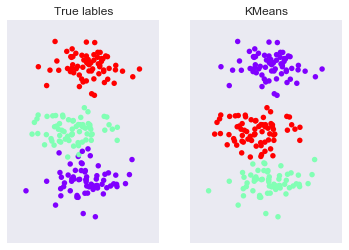

In [82]:
km = clu.KMeans(n_clusters=3)
km.fit(X)
display_clustering(km.labels_, "KMeans")

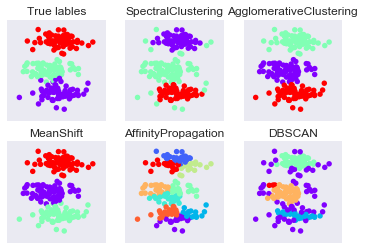

In [90]:
plt.subplot(231)
plt.scatter(X[:,0], X[:, 1], c=y, s=30, linewidths=0, cmap=plt.cm.rainbow)
plt.xticks([])
plt.yticks([])
plt.title("True lables")
for i, est in enumerate([clu.SpectralClustering(3), clu.AgglomerativeClustering(3),  clu.MeanShift(), clu.AffinityPropagation(),clu.DBSCAN()]):
    est.fit(X)
    c = relabel(est.labels_)
    plt.subplot(232 + i)
    plt.scatter(X[:,0], X[:, 1], c=c, s=30, linewidths=0, cmap=plt.cm.rainbow)
    plt.xticks([])
    plt.yticks([])
    plt.title(est.__class__.__name__)